# Parkinson's Disease Using Magnetic Resonance Imaging with Deep Learning Techniques



---



---





## Importing Modules

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

## Preparing Dataset

In [3]:
height_ = 512
width_ = 512

In [46]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [4]:
train = ImageDataGenerator(rescale=1/255, rotation_range = 0.2, brightness_range = (0.1,0.3))
test = ImageDataGenerator(rescale=1/255, rotation_range = 0.2, brightness_range = (0.1,0.3))

In [48]:
# cd drive/MyDrive

In [5]:
train_dataset = train.flow_from_directory("Train/Train/",
                                          target_size=(width_, height_), 
                                            # color_mode='grayscale',
                                            batch_size=8,
                                            class_mode='binary')
                                         
val_dataset = test.flow_from_directory("Test/Test/",
                                          target_size=(width_, height_),
                                            # color_mode='grayscale',
                                            batch_size=8,
                                            class_mode='binary')

Found 825 images belonging to 2 classes.
Found 166 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'Normal': 0, 'Parkinson': 1}

## Preparing Model

with tf.device('/device:GPU:0'):
    SIZE_OF_IP = (width_, height_, 3) 
    model = keras.Sequential()

    # Convolutional layer and maxpool layer 1
    model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=SIZE_OF_IP))
    model.add(keras.layers.MaxPool2D(2,2))

    # Convolutional layer and maxpool layer 2
    model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
    model.add(keras.layers.MaxPool2D(2,2))

    # Convolutional layer and maxpool layer 3
    model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Dropout(0.2))


    # # Convolutional layer and maxpool layer 4
    # model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
    # model.add(keras.layers.MaxPool2D(2,2))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512,activation='relu'))

   # Op layer
    model.add(keras.layers.Dense(1,activation='sigmoid'))

In [51]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

lesion_Classifier=Sequential()
lesion_Classifier.add(Convolution2D(16,(3,3),input_shape=(512,512,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Convolution2D(32,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Convolution2D(64,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Convolution2D(64,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Convolution2D(128,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Convolution2D(128,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))

lesion_Classifier.add(Flatten())
lesion_Classifier.add(Dense(512,activation='relu'))
lesion_Classifier.add(Dense(256,activation='relu'))
lesion_Classifier.add(Dense(1,activation='softmax'))

## Training

In [52]:
with tf.device('/device:GPU:0'):
    lesion_Classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    history=lesion_Classifier.fit(train_dataset,epochs=50,validation_data = val_dataset,callbacks=[es])

#     history = model.fit(train_dataset,epochs = 15,validation_data = val_dataset)

Epoch 1/50
104/104 [==============================] - 261s 2s/step - loss: 0.0000e+00 - accuracy: 0.4085 - val_loss: 0.0000e+00 - val_accuracy: 0.2651
Epoch 2/50
104/104 [==============================] - 2009s 19s/step - loss: 0.0000e+00 - accuracy: 0.4085 - val_loss: 0.0000e+00 - val_accuracy: 0.2651
Epoch 3/50
104/104 [==============================] - 262s 3s/step - loss: 0.0000e+00 - accuracy: 0.4085 - val_loss: 0.0000e+00 - val_accuracy: 0.2651
Epoch 4/50
104/104 [==============================] - 267s 3s/step - loss: nan - accuracy: 0.4497 - val_loss: nan - val_accuracy: 0.7349
Epoch 5/50
104/104 [==============================] - 266s 3s/step - loss: nan - accuracy: 0.5915 - val_loss: nan - val_accuracy: 0.7349
Epoch 6/50
104/104 [==============================] - 264s 3s/step - loss: nan - accuracy: 0.5915 - val_loss: nan - val_accuracy: 0.7349
Epoch 7/50
104/104 [==============================] - 261s 3s/step - loss: nan - accuracy: 0.5915 - val_loss: nan - val_accuracy: 0.73

<Figure size 432x288 with 0 Axes>

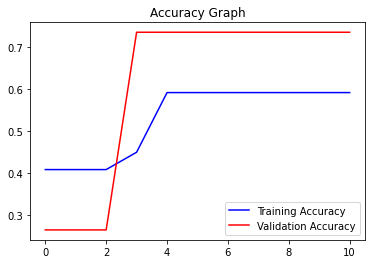

<Figure size 432x288 with 0 Axes>

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()


## Saving Model

In [7]:
model.save("park_grayscale_drop_git.h5")

NameError: name 'model' is not defined

## Loading Model

In [8]:
from keras import models

savedModel = models.load_model('park_grayscale_drop_git.h5')
savedModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 95, 95, 32)        32800     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 44, 44, 32)        16416     
                                                                 
 conv2d_13 (Conv2D)          (None, 42, 42, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 21, 21, 16)       0         
 2D)                                                  

## Inferencing

In [9]:
from PIL import Image, ImageOps

In [10]:
def make_list_of_imgs(path):
    imgs = []
    valid_images = [".png"]
    for f in os.listdir(path):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        imgs.append(path + f)
    return imgs

In [15]:
def tumor_prediction(*argv): 
    count_p = 0
    count_n = 0
    for arg in argv: 
        for filename in arg:
            # image_read = cv2.imread(filename)
            print(filename)
            im = Image.open(filename)
            im2 = im.convert('RGB')
            im2 = im2.resize((100, 100))
            # print(im1.shape)
            # image_read = cv2.resize(image_read, (height_, width_))
            image = np.array(im2) 
            # image = np.reshape(image, [100, 100, 3])
            plt.show()
            plt.imshow(image)
           
            X = np.expand_dims(image,axis=0)
            result = savedModel.predict(X)
#             print(val)
            if result == 1:
                plt.xlabel("Parkinsons",fontsize=15)
                count_p += 1


            elif result == 0:
                plt.xlabel("Normal",fontsize=15)
                count_n += 1
#         print("Normal: ", count_n)
#         print("Parkinsons: ", count_p)
    return count_p, count_n

### Testing on MRI images with cerebral Carcinoma

Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_001.png
1/1 [==============================] - 0s 249ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_002.png


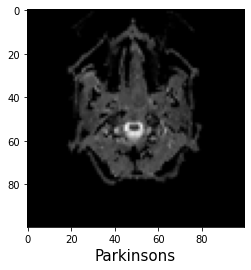

1/1 [==============================] - 0s 39ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_003.png


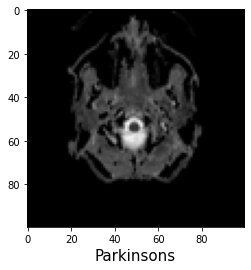

1/1 [==============================] - 0s 43ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_004.png


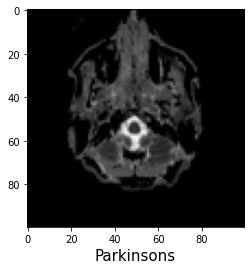

1/1 [==============================] - 0s 65ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_005.png


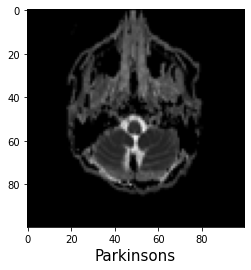

1/1 [==============================] - 0s 71ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_006.png


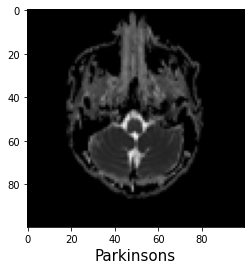

1/1 [==============================] - 0s 52ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_007.png


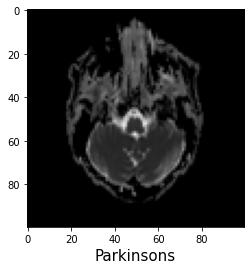

1/1 [==============================] - 0s 41ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_008.png


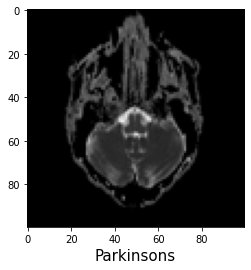

1/1 [==============================] - 0s 58ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_009.png


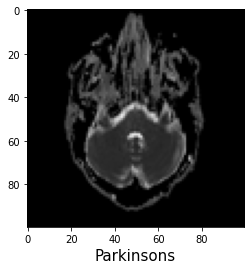

1/1 [==============================] - 0s 41ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_010.png


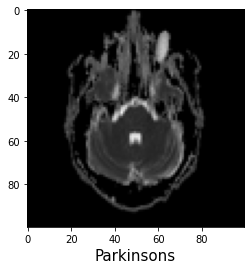

1/1 [==============================] - 0s 66ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_011.png


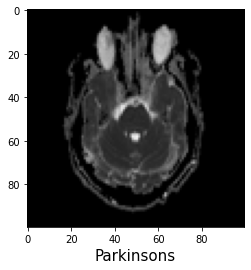

1/1 [==============================] - 0s 52ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_012.png


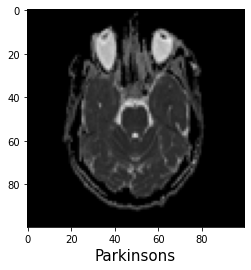

1/1 [==============================] - 0s 61ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_013.png


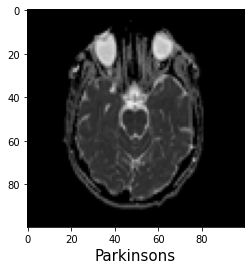

1/1 [==============================] - 0s 76ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_014.png


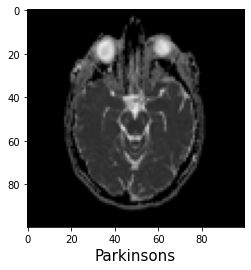

1/1 [==============================] - 0s 47ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_015.png


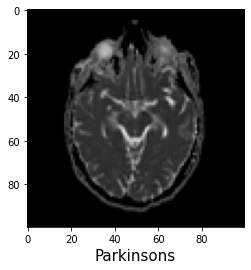

1/1 [==============================] - 0s 56ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_016.png


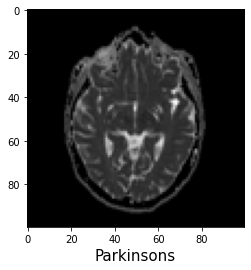

1/1 [==============================] - 0s 50ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_017.png


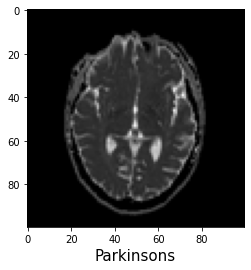

1/1 [==============================] - 0s 80ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_018.png


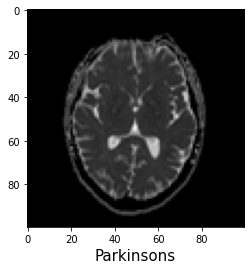

1/1 [==============================] - 0s 55ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_019.png


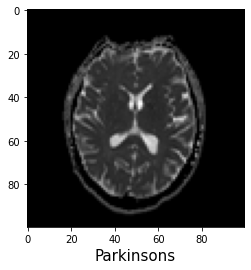

1/1 [==============================] - 0s 52ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_020.png


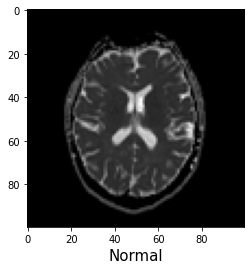

1/1 [==============================] - 0s 47ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_021.png


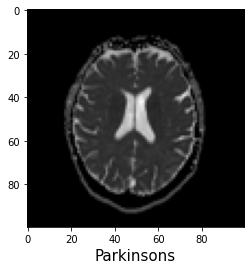

1/1 [==============================] - 0s 69ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_022.png


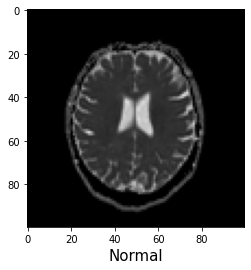

1/1 [==============================] - 0s 62ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_023.png


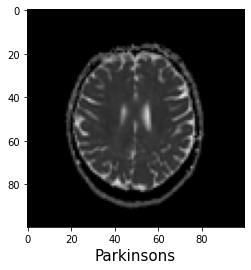

1/1 [==============================] - 0s 44ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_024.png


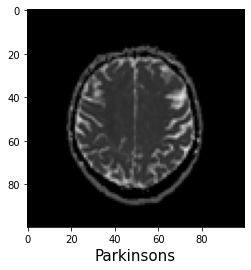

1/1 [==============================] - 0s 45ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_025.png


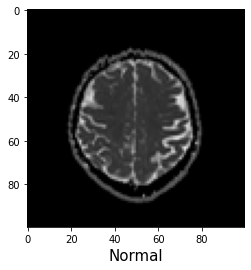

1/1 [==============================] - 0s 62ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_026.png


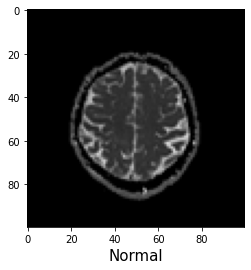

1/1 [==============================] - 0s 46ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_027.png


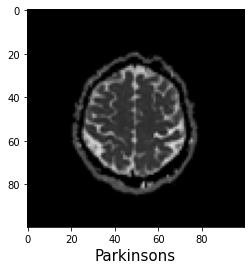

1/1 [==============================] - 0s 51ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_028.png


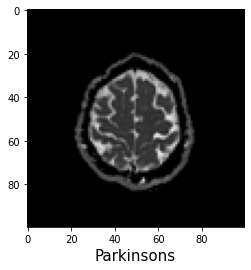

1/1 [==============================] - 0s 36ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_029.png


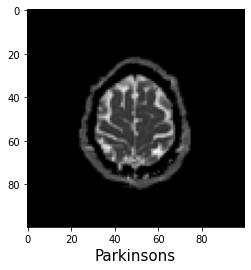

1/1 [==============================] - 0s 73ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_030.png


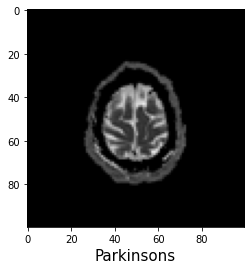

1/1 [==============================] - 0s 47ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_001.png


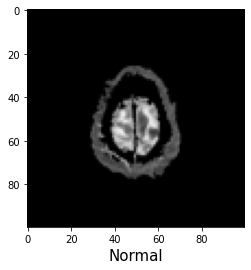

1/1 [==============================] - 0s 56ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_002.png


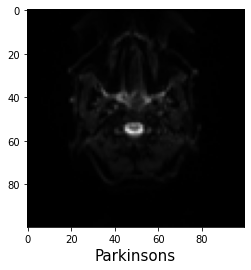

1/1 [==============================] - 0s 70ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_003.png


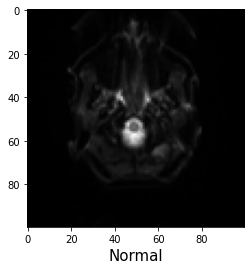

1/1 [==============================] - 0s 54ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_004.png


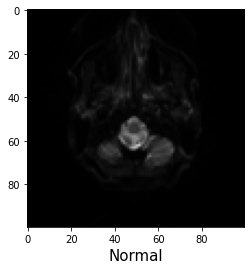

1/1 [==============================] - 0s 47ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_005.png


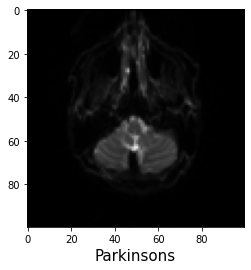

1/1 [==============================] - 0s 76ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_006.png


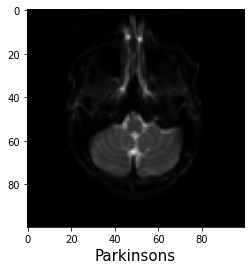

1/1 [==============================] - 0s 70ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_007.png


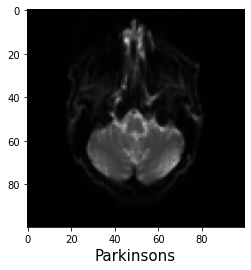

1/1 [==============================] - 0s 57ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_008.png


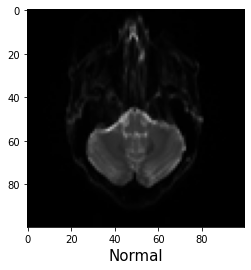

1/1 [==============================] - 0s 64ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_009.png


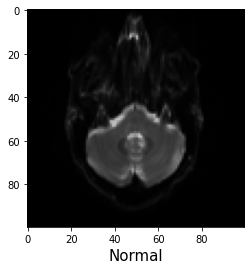

1/1 [==============================] - 0s 71ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_010.png


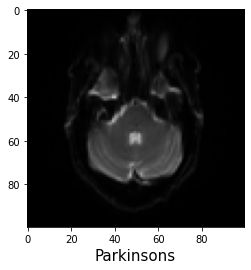

1/1 [==============================] - 0s 77ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_011.png


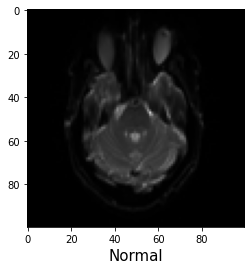

1/1 [==============================] - 0s 73ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_012.png


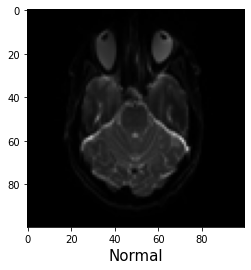

1/1 [==============================] - 0s 87ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_013.png


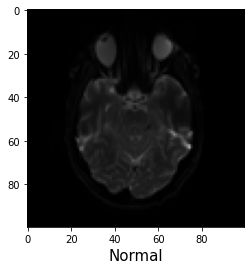

1/1 [==============================] - 0s 55ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_014.png


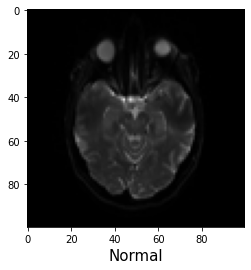

1/1 [==============================] - 0s 72ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_015.png


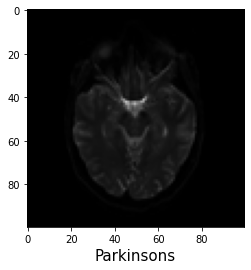

1/1 [==============================] - 0s 68ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_016.png


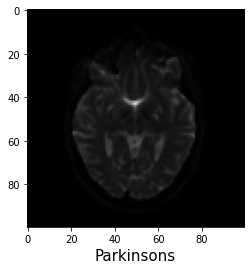

1/1 [==============================] - 0s 72ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_017.png


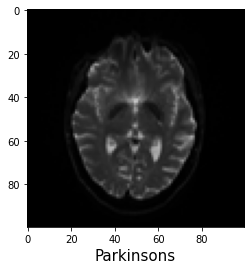

1/1 [==============================] - 0s 52ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_018.png


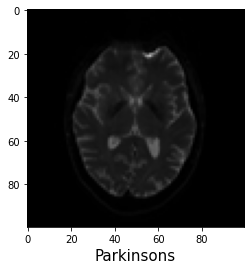

1/1 [==============================] - 0s 85ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_019.png


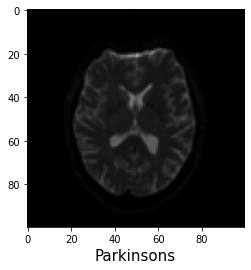

1/1 [==============================] - 0s 57ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_020.png


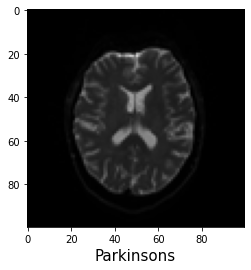

1/1 [==============================] - 0s 141ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_021.png


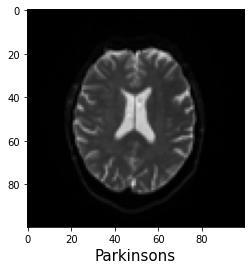

1/1 [==============================] - 0s 72ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_022.png


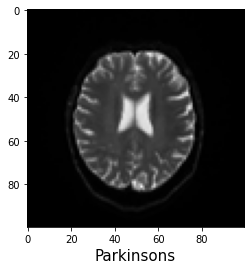

1/1 [==============================] - 0s 62ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_023.png


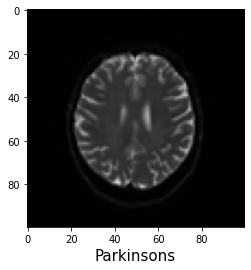

1/1 [==============================] - 0s 80ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_024.png


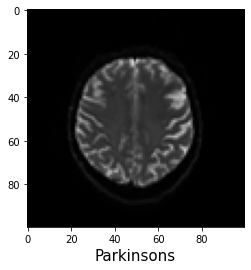

1/1 [==============================] - 0s 91ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_025.png


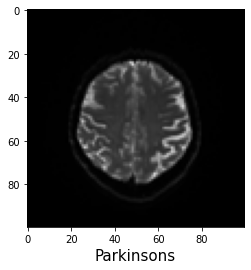

1/1 [==============================] - 0s 63ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_026.png


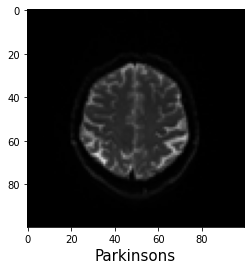

1/1 [==============================] - 0s 72ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_027.png


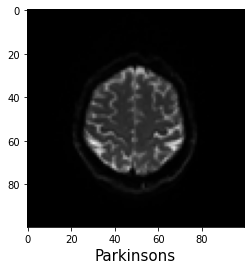

1/1 [==============================] - 0s 84ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_028.png


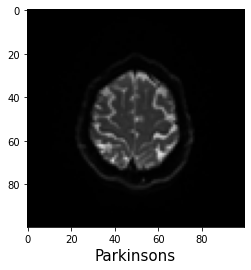

1/1 [==============================] - 0s 62ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_029.png


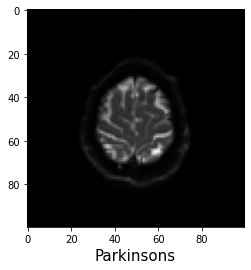

1/1 [==============================] - 0s 62ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_030.png


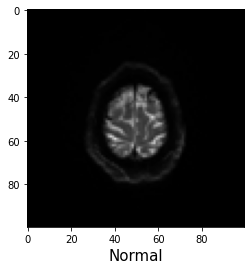

1/1 [==============================] - 0s 54ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_031.png


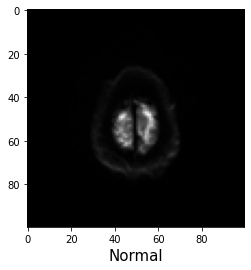

1/1 [==============================] - 0s 67ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_032.png


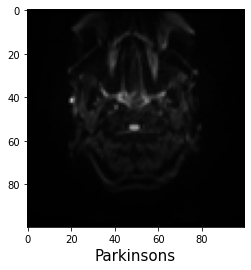

1/1 [==============================] - 0s 56ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_033.png


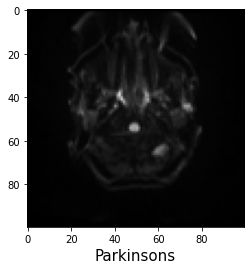

1/1 [==============================] - 0s 78ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_034.png


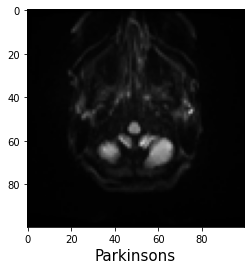

1/1 [==============================] - 0s 62ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_035.png


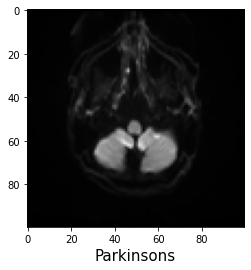

1/1 [==============================] - 0s 68ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_036.png


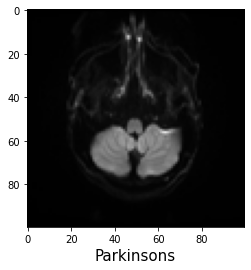

1/1 [==============================] - 0s 71ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_037.png


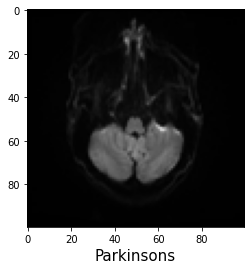

1/1 [==============================] - 0s 47ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_038.png


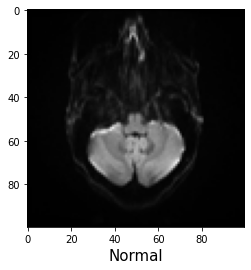

1/1 [==============================] - 0s 76ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_039.png


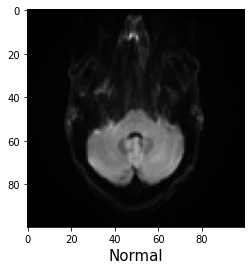

1/1 [==============================] - 0s 78ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_040.png


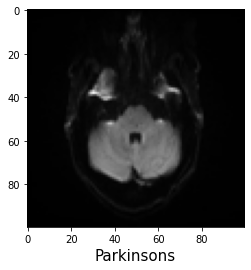

1/1 [==============================] - 0s 74ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_041.png


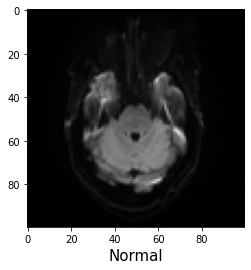

1/1 [==============================] - 0s 47ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_042.png


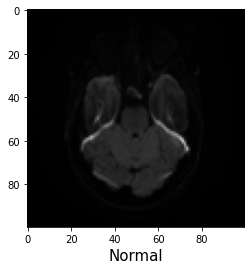

1/1 [==============================] - 0s 62ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_043.png


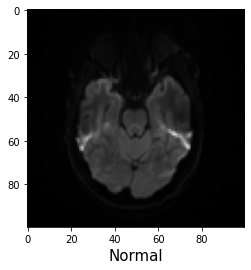

1/1 [==============================] - 0s 65ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_044.png


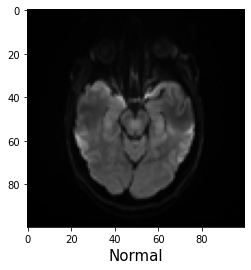

1/1 [==============================] - 0s 87ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_045.png


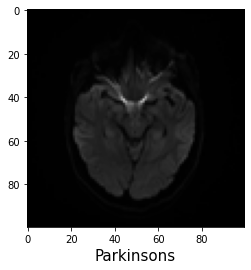

1/1 [==============================] - 0s 79ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_046.png


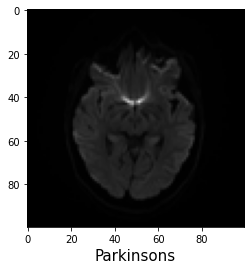

1/1 [==============================] - 0s 68ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_047.png


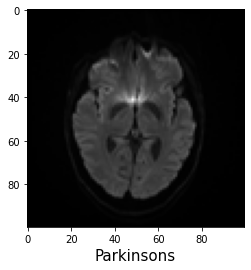

1/1 [==============================] - 0s 48ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_048.png


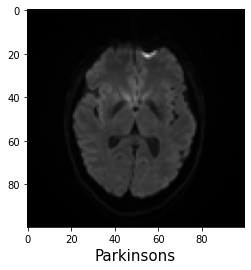

1/1 [==============================] - 0s 47ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_049.png


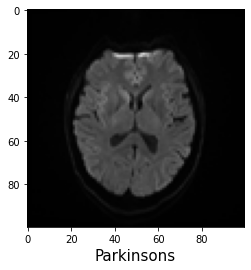

1/1 [==============================] - 0s 74ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_050.png


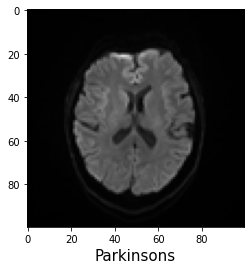

1/1 [==============================] - 0s 62ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_051.png


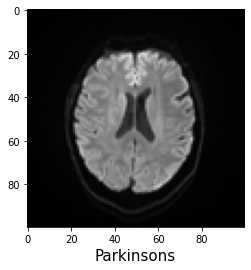

1/1 [==============================] - 0s 50ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_052.png


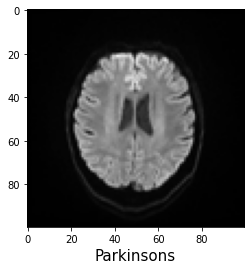

1/1 [==============================] - 0s 51ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_053.png


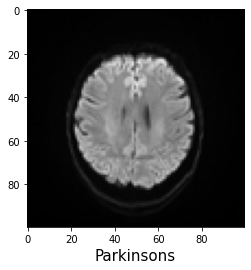

1/1 [==============================] - 0s 73ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_054.png


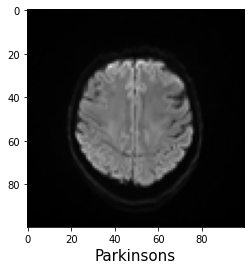

1/1 [==============================] - 0s 87ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_055.png


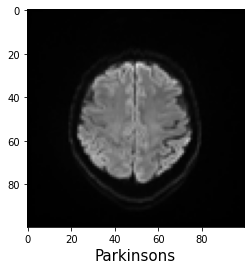

1/1 [==============================] - 0s 72ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_056.png


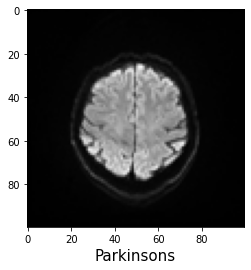

1/1 [==============================] - 0s 64ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_057.png


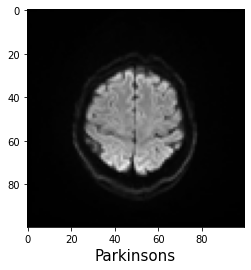

1/1 [==============================] - 0s 53ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_058.png


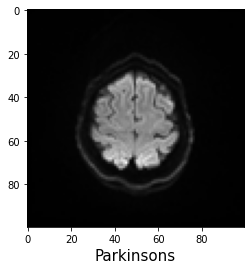

1/1 [==============================] - 0s 60ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_059.png


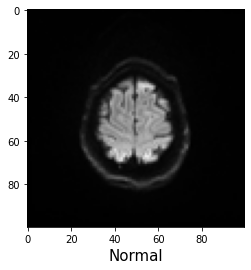

1/1 [==============================] - 0s 102ms/step
Test/Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_060.png


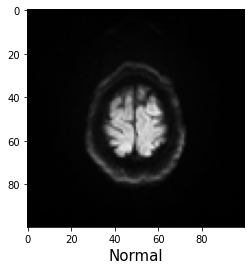

1/1 [==============================] - 0s 51ms/step
Test/Test/Normal/localizer_001.png


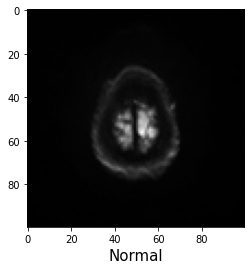

1/1 [==============================] - 0s 55ms/step
Test/Test/Normal/localizer_002.png


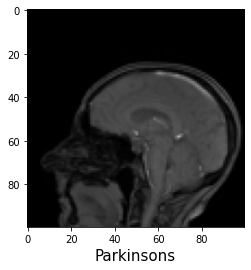

1/1 [==============================] - 0s 74ms/step
Test/Test/Normal/localizer_003.png


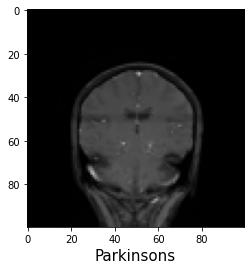

1/1 [==============================] - 0s 49ms/step
Test/Test/Normal/Mag_Images_001.png


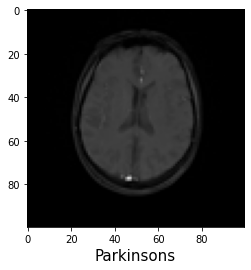

1/1 [==============================] - 0s 54ms/step
Test/Test/Normal/Mag_Images_002.png


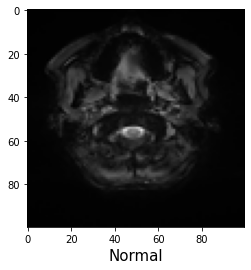

1/1 [==============================] - 0s 83ms/step
Test/Test/Normal/Mag_Images_003.png


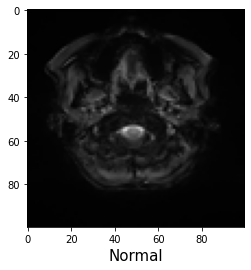

1/1 [==============================] - 0s 41ms/step
Test/Test/Normal/Mag_Images_004.png


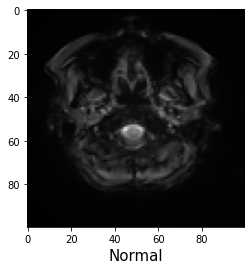

1/1 [==============================] - 0s 59ms/step
Test/Test/Normal/Mag_Images_005.png


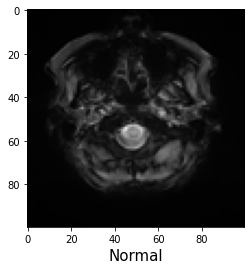

1/1 [==============================] - 0s 60ms/step
Test/Test/Normal/Mag_Images_006.png


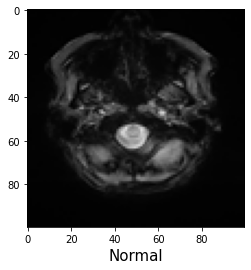

1/1 [==============================] - 0s 88ms/step
Test/Test/Normal/Mag_Images_007.png


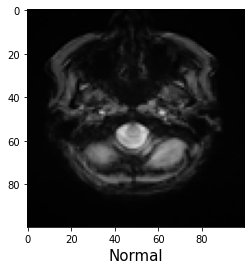

1/1 [==============================] - 0s 53ms/step
Test/Test/Normal/Mag_Images_008.png


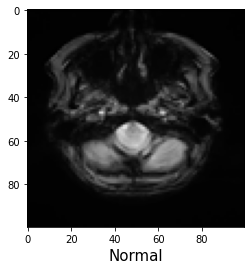

1/1 [==============================] - 0s 76ms/step
Test/Test/Normal/Mag_Images_009.png


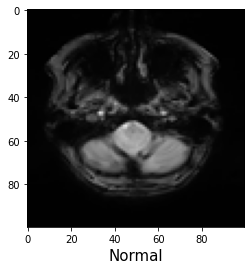

1/1 [==============================] - 0s 60ms/step
Test/Test/Normal/Mag_Images_010.png


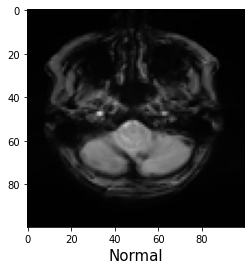

1/1 [==============================] - 0s 65ms/step
Test/Test/Normal/Mag_Images_011.png


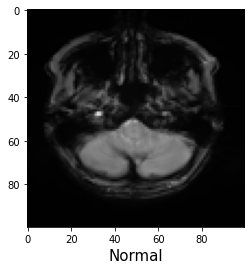

1/1 [==============================] - 0s 59ms/step
Test/Test/Normal/Mag_Images_012.png


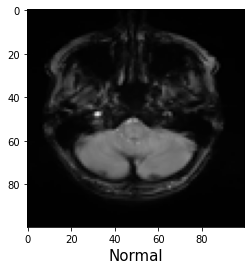

1/1 [==============================] - 0s 54ms/step
Test/Test/Normal/Mag_Images_013.png


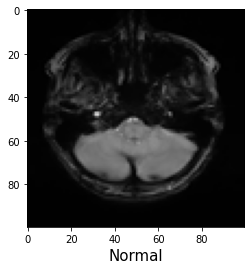

1/1 [==============================] - 0s 53ms/step
Test/Test/Normal/Mag_Images_014.png


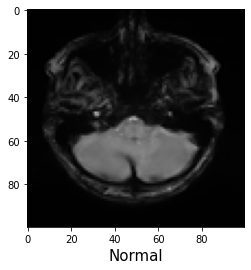

1/1 [==============================] - 0s 53ms/step
Test/Test/Normal/Mag_Images_015.png


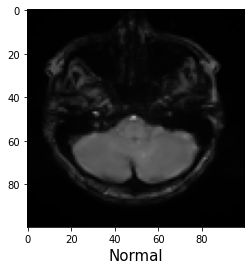

1/1 [==============================] - 0s 55ms/step
Test/Test/Normal/Mag_Images_016.png


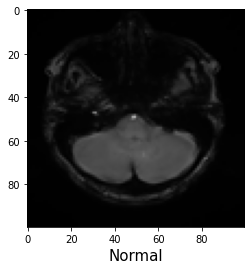

1/1 [==============================] - 0s 60ms/step
Test/Test/Normal/Mag_Images_017.png


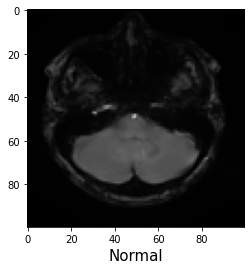

1/1 [==============================] - 0s 55ms/step
Test/Test/Normal/Mag_Images_018.png


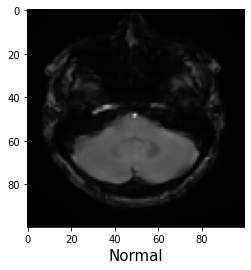

1/1 [==============================] - 0s 51ms/step
Test/Test/Normal/Mag_Images_019.png


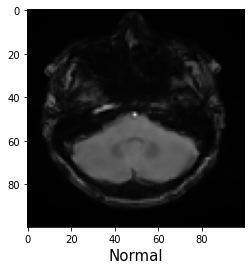

1/1 [==============================] - 0s 56ms/step
Test/Test/Normal/Mag_Images_020.png


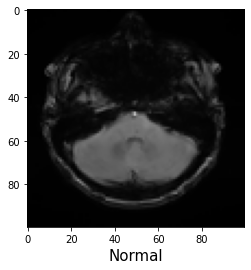

1/1 [==============================] - 0s 125ms/step
Test/Test/Normal/Mag_Images_021.png


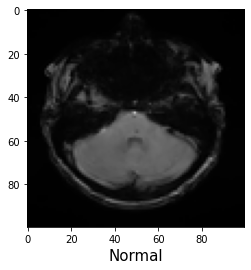

1/1 [==============================] - 0s 93ms/step
Test/Test/Normal/Mag_Images_022.png


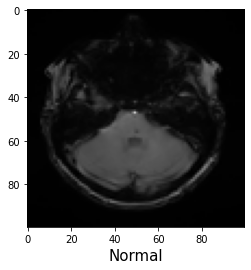

1/1 [==============================] - 0s 54ms/step
Test/Test/Normal/Mag_Images_023.png


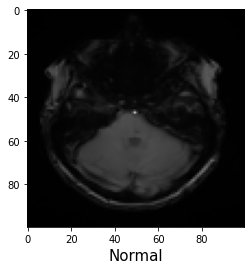

1/1 [==============================] - 0s 87ms/step
Test/Test/Normal/Mag_Images_024.png


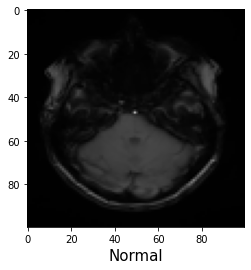

1/1 [==============================] - 0s 48ms/step
Test/Test/Normal/Mag_Images_025.png


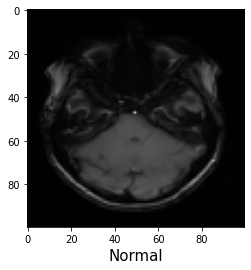

1/1 [==============================] - 0s 53ms/step
Test/Test/Normal/Mag_Images_026.png


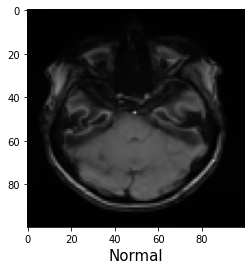

1/1 [==============================] - 0s 47ms/step
Test/Test/Normal/Mag_Images_027.png


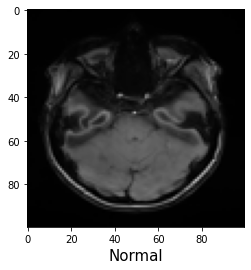

1/1 [==============================] - 0s 53ms/step
Test/Test/Normal/Mag_Images_028.png


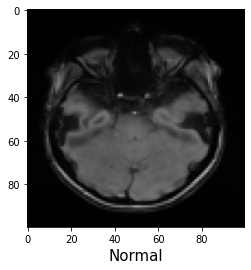

1/1 [==============================] - 0s 52ms/step
Test/Test/Normal/Mag_Images_029.png


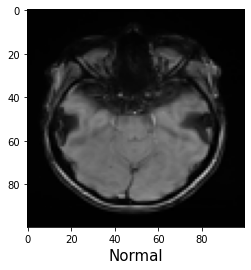

1/1 [==============================] - 0s 55ms/step
69 53


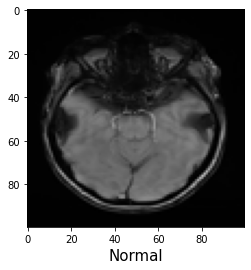

In [16]:
fp, tn = tumor_prediction(make_list_of_imgs('Test/Test/Normal/') )
print(fp, tn)
# make_list_of_imgs('Test/Normal/')

### Testing with MRI images without cerebral carcinoma

Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_001.png
1/1 [==============================] - 0s 68ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_002.png


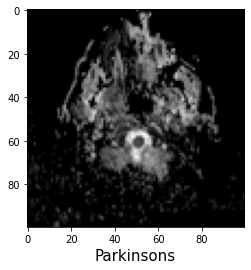

1/1 [==============================] - 0s 64ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_003.png


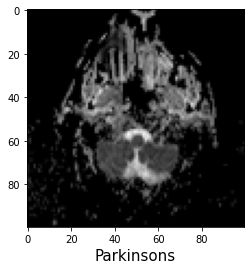

1/1 [==============================] - 0s 75ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_004.png


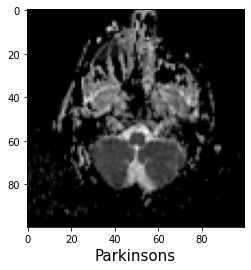

1/1 [==============================] - 0s 83ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_005.png


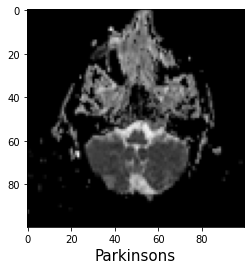

1/1 [==============================] - 0s 69ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_006.png


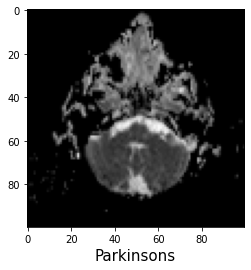

1/1 [==============================] - 0s 56ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_007.png


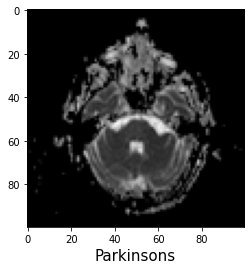

1/1 [==============================] - 0s 61ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_008.png


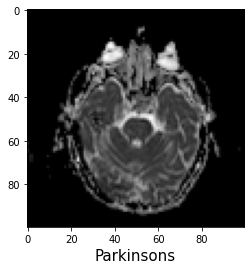

1/1 [==============================] - 0s 65ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_009.png


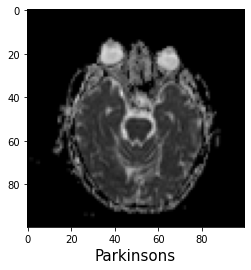

1/1 [==============================] - 0s 78ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_010.png


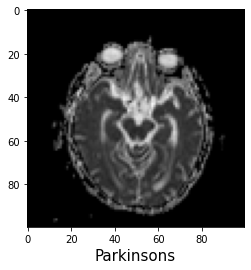

1/1 [==============================] - 0s 77ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_011.png


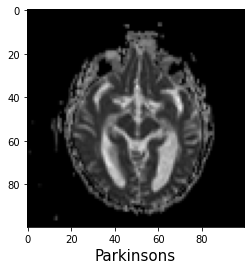

1/1 [==============================] - 0s 56ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_012.png


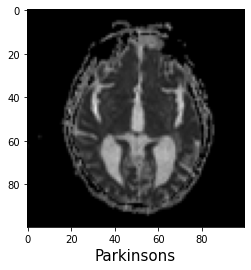

1/1 [==============================] - 0s 58ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_013.png


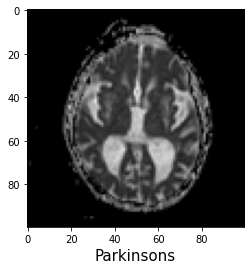

1/1 [==============================] - 0s 49ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_014.png


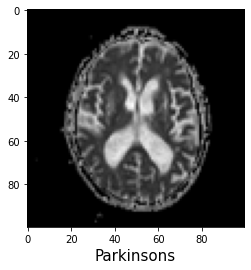

1/1 [==============================] - 0s 52ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_015.png


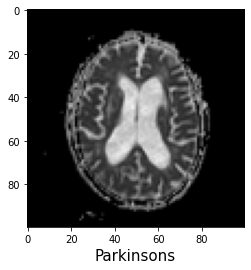

1/1 [==============================] - 0s 48ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_016.png


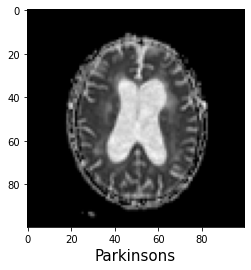

1/1 [==============================] - 0s 65ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_017.png


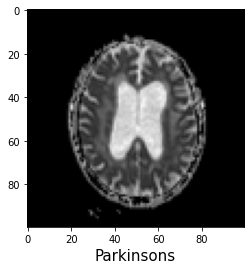

1/1 [==============================] - 0s 35ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_018.png


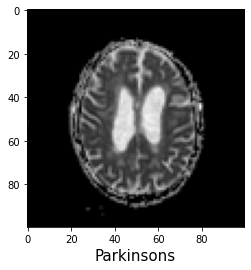

1/1 [==============================] - 0s 55ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_019.png


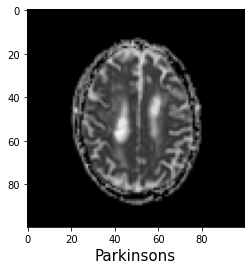

1/1 [==============================] - 0s 68ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_020.png


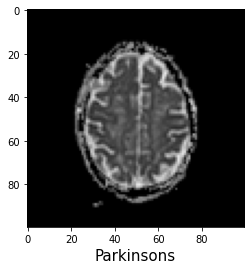

1/1 [==============================] - 0s 62ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_021.png


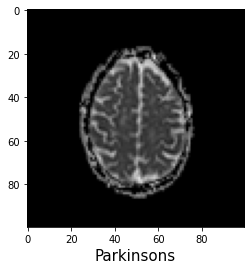

1/1 [==============================] - 0s 60ms/step
Test/Test/Parkinson/dReg_-_sDW_SSh_SENSE_022.png


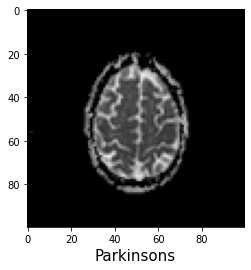

1/1 [==============================] - 0s 63ms/step
Test/Test/Parkinson/DUAL_TSE_001.png


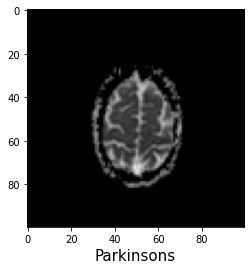

1/1 [==============================] - 0s 201ms/step
Test/Test/Parkinson/DUAL_TSE_002.png


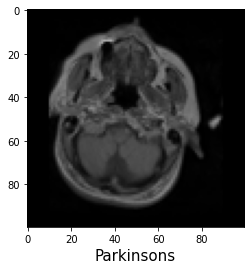

1/1 [==============================] - 0s 83ms/step
Test/Test/Parkinson/DUAL_TSE_003.png


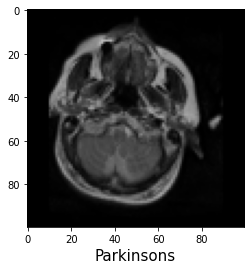

1/1 [==============================] - 0s 136ms/step
Test/Test/Parkinson/DUAL_TSE_004.png


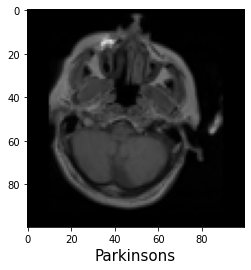

1/1 [==============================] - 0s 63ms/step
Test/Test/Parkinson/DUAL_TSE_005.png


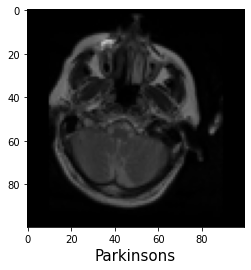

1/1 [==============================] - 0s 62ms/step
Test/Test/Parkinson/DUAL_TSE_006.png


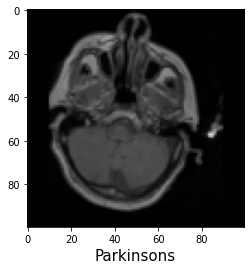

1/1 [==============================] - 0s 64ms/step
Test/Test/Parkinson/DUAL_TSE_007.png


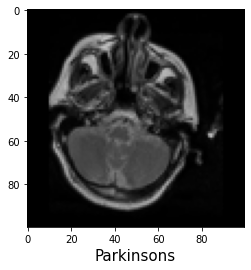

1/1 [==============================] - 0s 59ms/step
Test/Test/Parkinson/DUAL_TSE_008.png


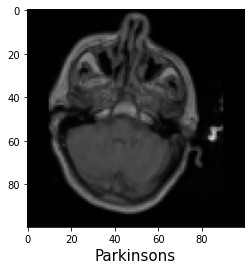

1/1 [==============================] - 0s 85ms/step
Test/Test/Parkinson/DUAL_TSE_009.png


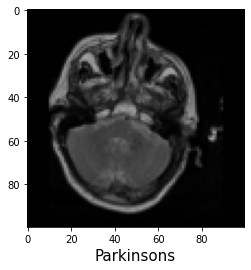

1/1 [==============================] - 0s 77ms/step
Test/Test/Parkinson/DUAL_TSE_010.png


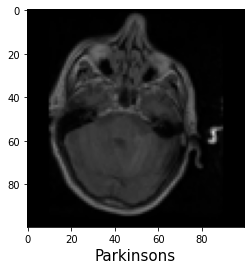

1/1 [==============================] - 0s 58ms/step
Test/Test/Parkinson/DUAL_TSE_011.png


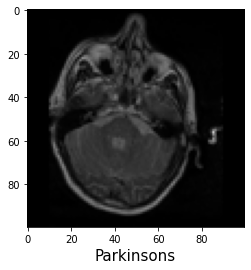

1/1 [==============================] - 0s 61ms/step
Test/Test/Parkinson/DUAL_TSE_012.png


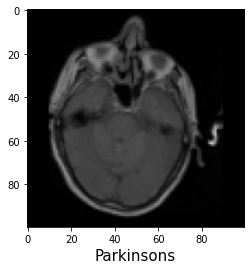

1/1 [==============================] - 0s 73ms/step
Test/Test/Parkinson/DUAL_TSE_013.png


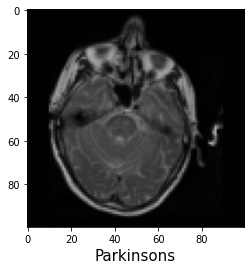

1/1 [==============================] - 0s 74ms/step
Test/Test/Parkinson/DUAL_TSE_014.png


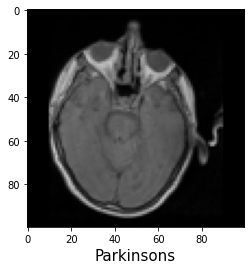

1/1 [==============================] - 0s 100ms/step
Test/Test/Parkinson/DUAL_TSE_015.png


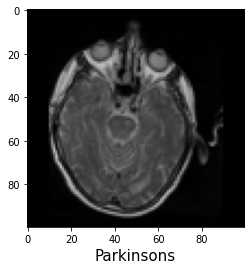

1/1 [==============================] - 0s 61ms/step
Test/Test/Parkinson/DUAL_TSE_016.png


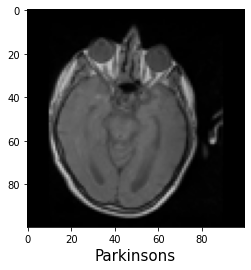

1/1 [==============================] - 0s 82ms/step
Test/Test/Parkinson/DUAL_TSE_017.png


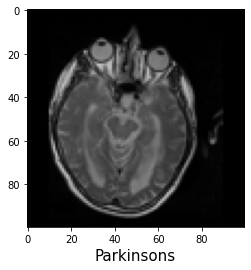

1/1 [==============================] - 0s 53ms/step
Test/Test/Parkinson/DUAL_TSE_018.png


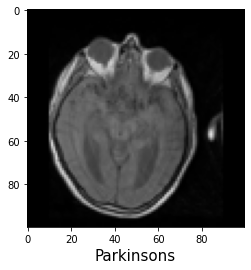

1/1 [==============================] - 0s 75ms/step


In [ ]:
tp, fn = tumor_prediction(make_list_of_imgs('Test/Test/Parkinson/') )#classified
print(tp, fn)

Out of the 10 test images, 9 were classified correctly

In [46]:
def accuracy_cnn(tp, tn, fp, fn):
    return (tp + tn)/(tp + tn + fp + fn)

In [49]:
accuracy_cnn(tp, tn, fp, fn)

0.703030303030303